In [ ]:
import torch
from dem.energies.gmm_energy import GMM
import matplotlib.pyplot as plt

/storage/scratch1/e17-kadsap-diffusion-models/miniconda3/envs/dem/lib/python3.10/site-packages/torchmetrics/utilities/imports.py:22: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  from pkg_resources import DistributionNotFound, get_distribution


In [3]:
# Paths
gen_path = "gmm/samples_1_100000.pt"

# Instantiate GMM (same settings as before)
gmm_obj = GMM(
    dimensionality=2,
    n_mixes=40,
    loc_scaling=40,
    log_var_scaling=1.0,
    device="cpu",
    train_set_size=100000,)

/tmp/ipykernel_2078033/1171498959.py:6: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  gen_samples = torch.load(gen_path).cpu()


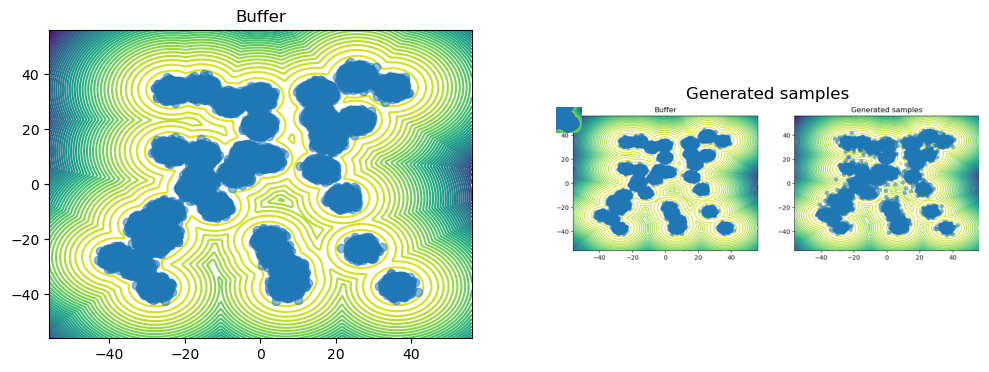

In [ ]:
# Get training set (reference)
train_samples = gmm_obj.setup_train_set().cpu()
train_samples_unnorm = gmm_obj.unnormalize(train_samples)

# Load generated set
gen_samples = torch.load(gen_path).cpu()
gen_samples_unnorm = gmm_obj.unnormalize(gen_samples)
# Use built-in plotting
img = gmm_obj.get_dataset_fig(train_samples_unnorm, gen_samples_unnorm)

# Display
plt.imshow(img)
plt.axis("off")
plt.show()


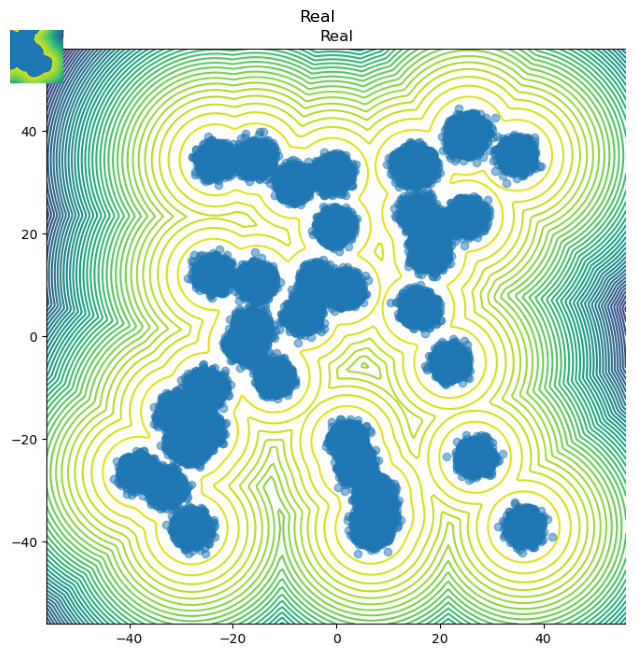

In [8]:
real = gmm_obj.get_single_dataset_fig(train_samples_unnorm, "Real")
plt.imshow(real)
plt.axis("off")
plt.show()

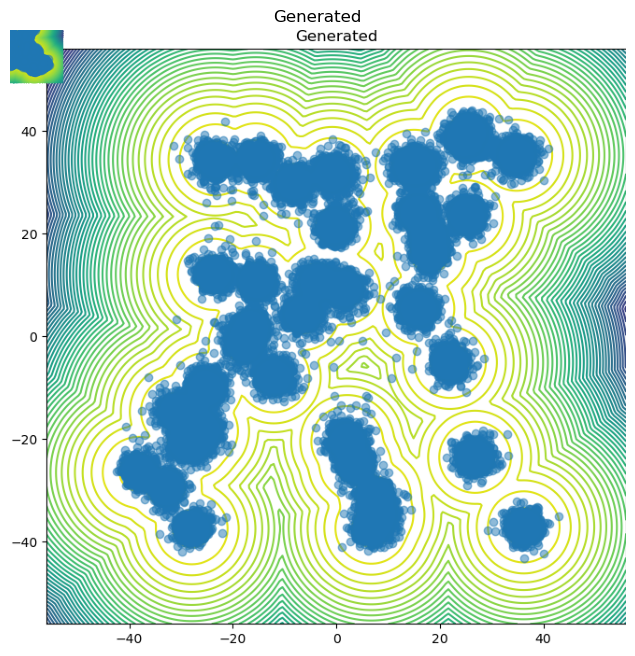

In [9]:
gen = gmm_obj.get_single_dataset_fig(gen_samples_unnorm, "Generated")
plt.imshow(gen)
plt.axis("off")
plt.show()